### Bluff Detector using Polynimial Regression
- A Machine learning model that can help HR team to detect the bluff of a candidate regarding the negotiation salary WRT the years of experience

### Problem
 ##### HR team of a company is going to hire a new employee and is going to make an offer for him. The potential candidate says that he had experience of 15+ years and was taking 160k salary in his previous company and wants more than that as he can bring value to the company. He also says that he was working as a Regional Manager. So, the HR team wants to make a model to check if that to be employee is bluffing or telling the truth about his salary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
position_salaries = pd.read_csv('../Dataset/Position_Salaries.csv')
position_salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<Axes: xlabel='Level', ylabel='Salary'>

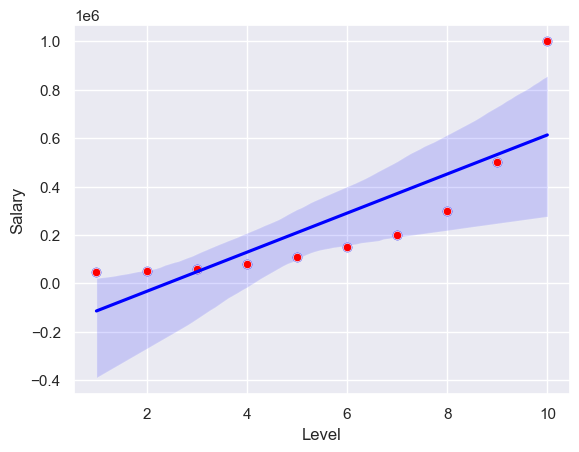

In [11]:
sns.regplot(x = 'Level', y = 'Salary', data = position_salaries, color = 'blue')
sns.scatterplot(x = 'Level', y = 'Salary', data = position_salaries, color = 'red')

#### Splitting the dataset into the Training set and Test set

In [27]:
X = position_salaries.iloc[:, 1:-1].values
y = position_salaries.iloc[:, -1].values

In [ ]:
'''
position_salaries.iloc[:, 1].values     =>  Size (10,) => Vector 
position_salaries.iloc[:, 1:-1].values     =>  Size (10,1) => Matrix 

We need to pass a matrix 
'''

In [ ]:
'''
No Need for splitting the data (Just 10 records)
'''

#### Fitting Linear Regression to the dataset

In [28]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

#### Fitting Polynomial Regression to the dataset

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)   
X_poly = poly_reg.fit_transform(X)      # ==>  y = b0 + b1x + b2x^2 + b3x^3 + b4x^4 
                                        # 5 features:   [5 coefficients: b0, b1, b2, b3, b4] [5 terms: 1, x, x^2, x^3, x^4]
Polynomial_regressor = LinearRegression().fit(X_poly, y)

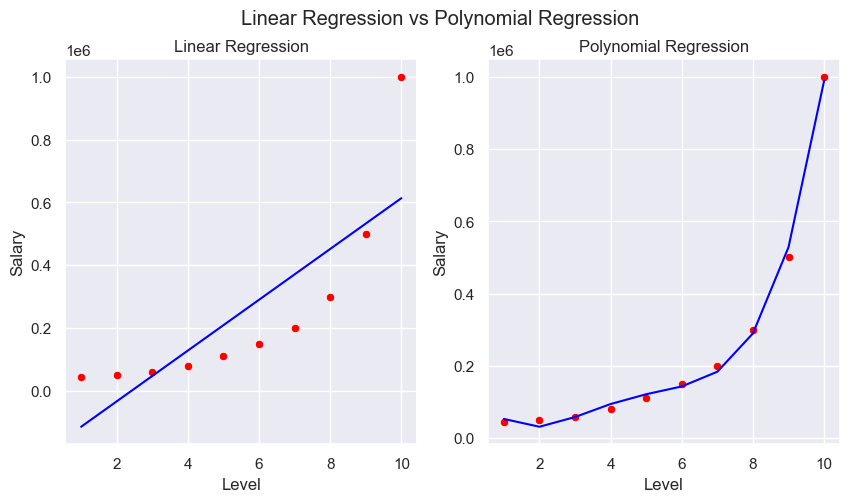

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharex = True)
fig.suptitle('Linear Regression vs Polynomial Regression')

# Linear Regression
axes[0].set_title('Linear Regression')
sns.scatterplot(data=position_salaries, x='Level', y='Salary', color='red', ax=axes[0])
axes[0].plot(X, linear_regressor.predict(X), color='blue')

# Polynomial Regression
axes[1].set_title('Polynomial Regression')
sns.scatterplot(data=position_salaries, x='Level', y='Salary', color='red', ax=axes[1])
axes[1].plot(X, Polynomial_regressor.predict(X_poly), color='blue')



In [52]:
linear_regressor.score(X, y)

0.6690412331929895

In [53]:
Polynomial_regressor.score(X_poly, y)

0.9973922891706614

#### Predicting a new result with Linear Regression
##### For Salary = 160k , Level = 6.4

In [73]:
linear_regressor.predict([[6.4]])

array([322290.90909091])

#### Predicting a new result with Polynomial Regression
##### For Salary = 160k , Level = 6.4

In [74]:
Polynomial_regressor.predict(poly_reg.fit_transform([[6.4]]))

array([155162.88111892])